<a href="https://colab.research.google.com/github/byanflowers/UTS-DATA-MINING/blob/main/UTS_DATA_ABYAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
path = kagglehub.dataset_download("aaron7sun/stocknews")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/stocknews


In [340]:
# Menampilkan isi folder dataset untuk memastikan nama file yang benar
dataset_folder =  '/root/.cache/kagglehub/datasets/aaron7sun/stocknews/versions/2'
for filename in os.listdir(dataset_folder):
    print(filename)


upload_DJIA_table.csv
Combined_News_DJIA.csv
RedditNews.csv


In [341]:
file_path = os.path.join(dataset_folder,'upload_DJIA_table.csv')

In [342]:
# Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())

         Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234  


In [343]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [344]:
df = df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

In [345]:
x = df[['Open', 'High', 'Low','Volume', 'Adj Close']]
y = df['Close']

In [346]:
x

,Open,High,Low,Volume,Adj Close
0,17924.240234,18002.380859,17916.910156,82160000,17949.369141
1,17712.759766,17930.609375,17711.800781,133030000,17929.990234
2,17456.019531,17704.509766,17456.019531,106380000,17694.679688
3,17190.509766,17409.720703,17190.509766,112190000,17409.720703
4,17355.210938,17355.210938,17063.080078,138740000,17140.240234
...,...,...,...,...,...
1984,11532.070312,11718.280273,11450.889648,159790000,11615.929688
1985,11632.809570,11633.780273,11453.339844,182550000,11532.959961
1986,11781.700195,11782.349609,11601.519531,173590000,11642.469727
1987,11729.669922,11867.110352,11675.530273,183190000,11782.349609


In [347]:
y

,Close
0,17949.369141
1,17929.990234
2,17694.679688
3,17409.720703
4,17140.240234
...,...
1984,11615.929688
1985,11532.959961
1986,11642.469727
1987,11782.349609


In [348]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [349]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [350]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 98.21%


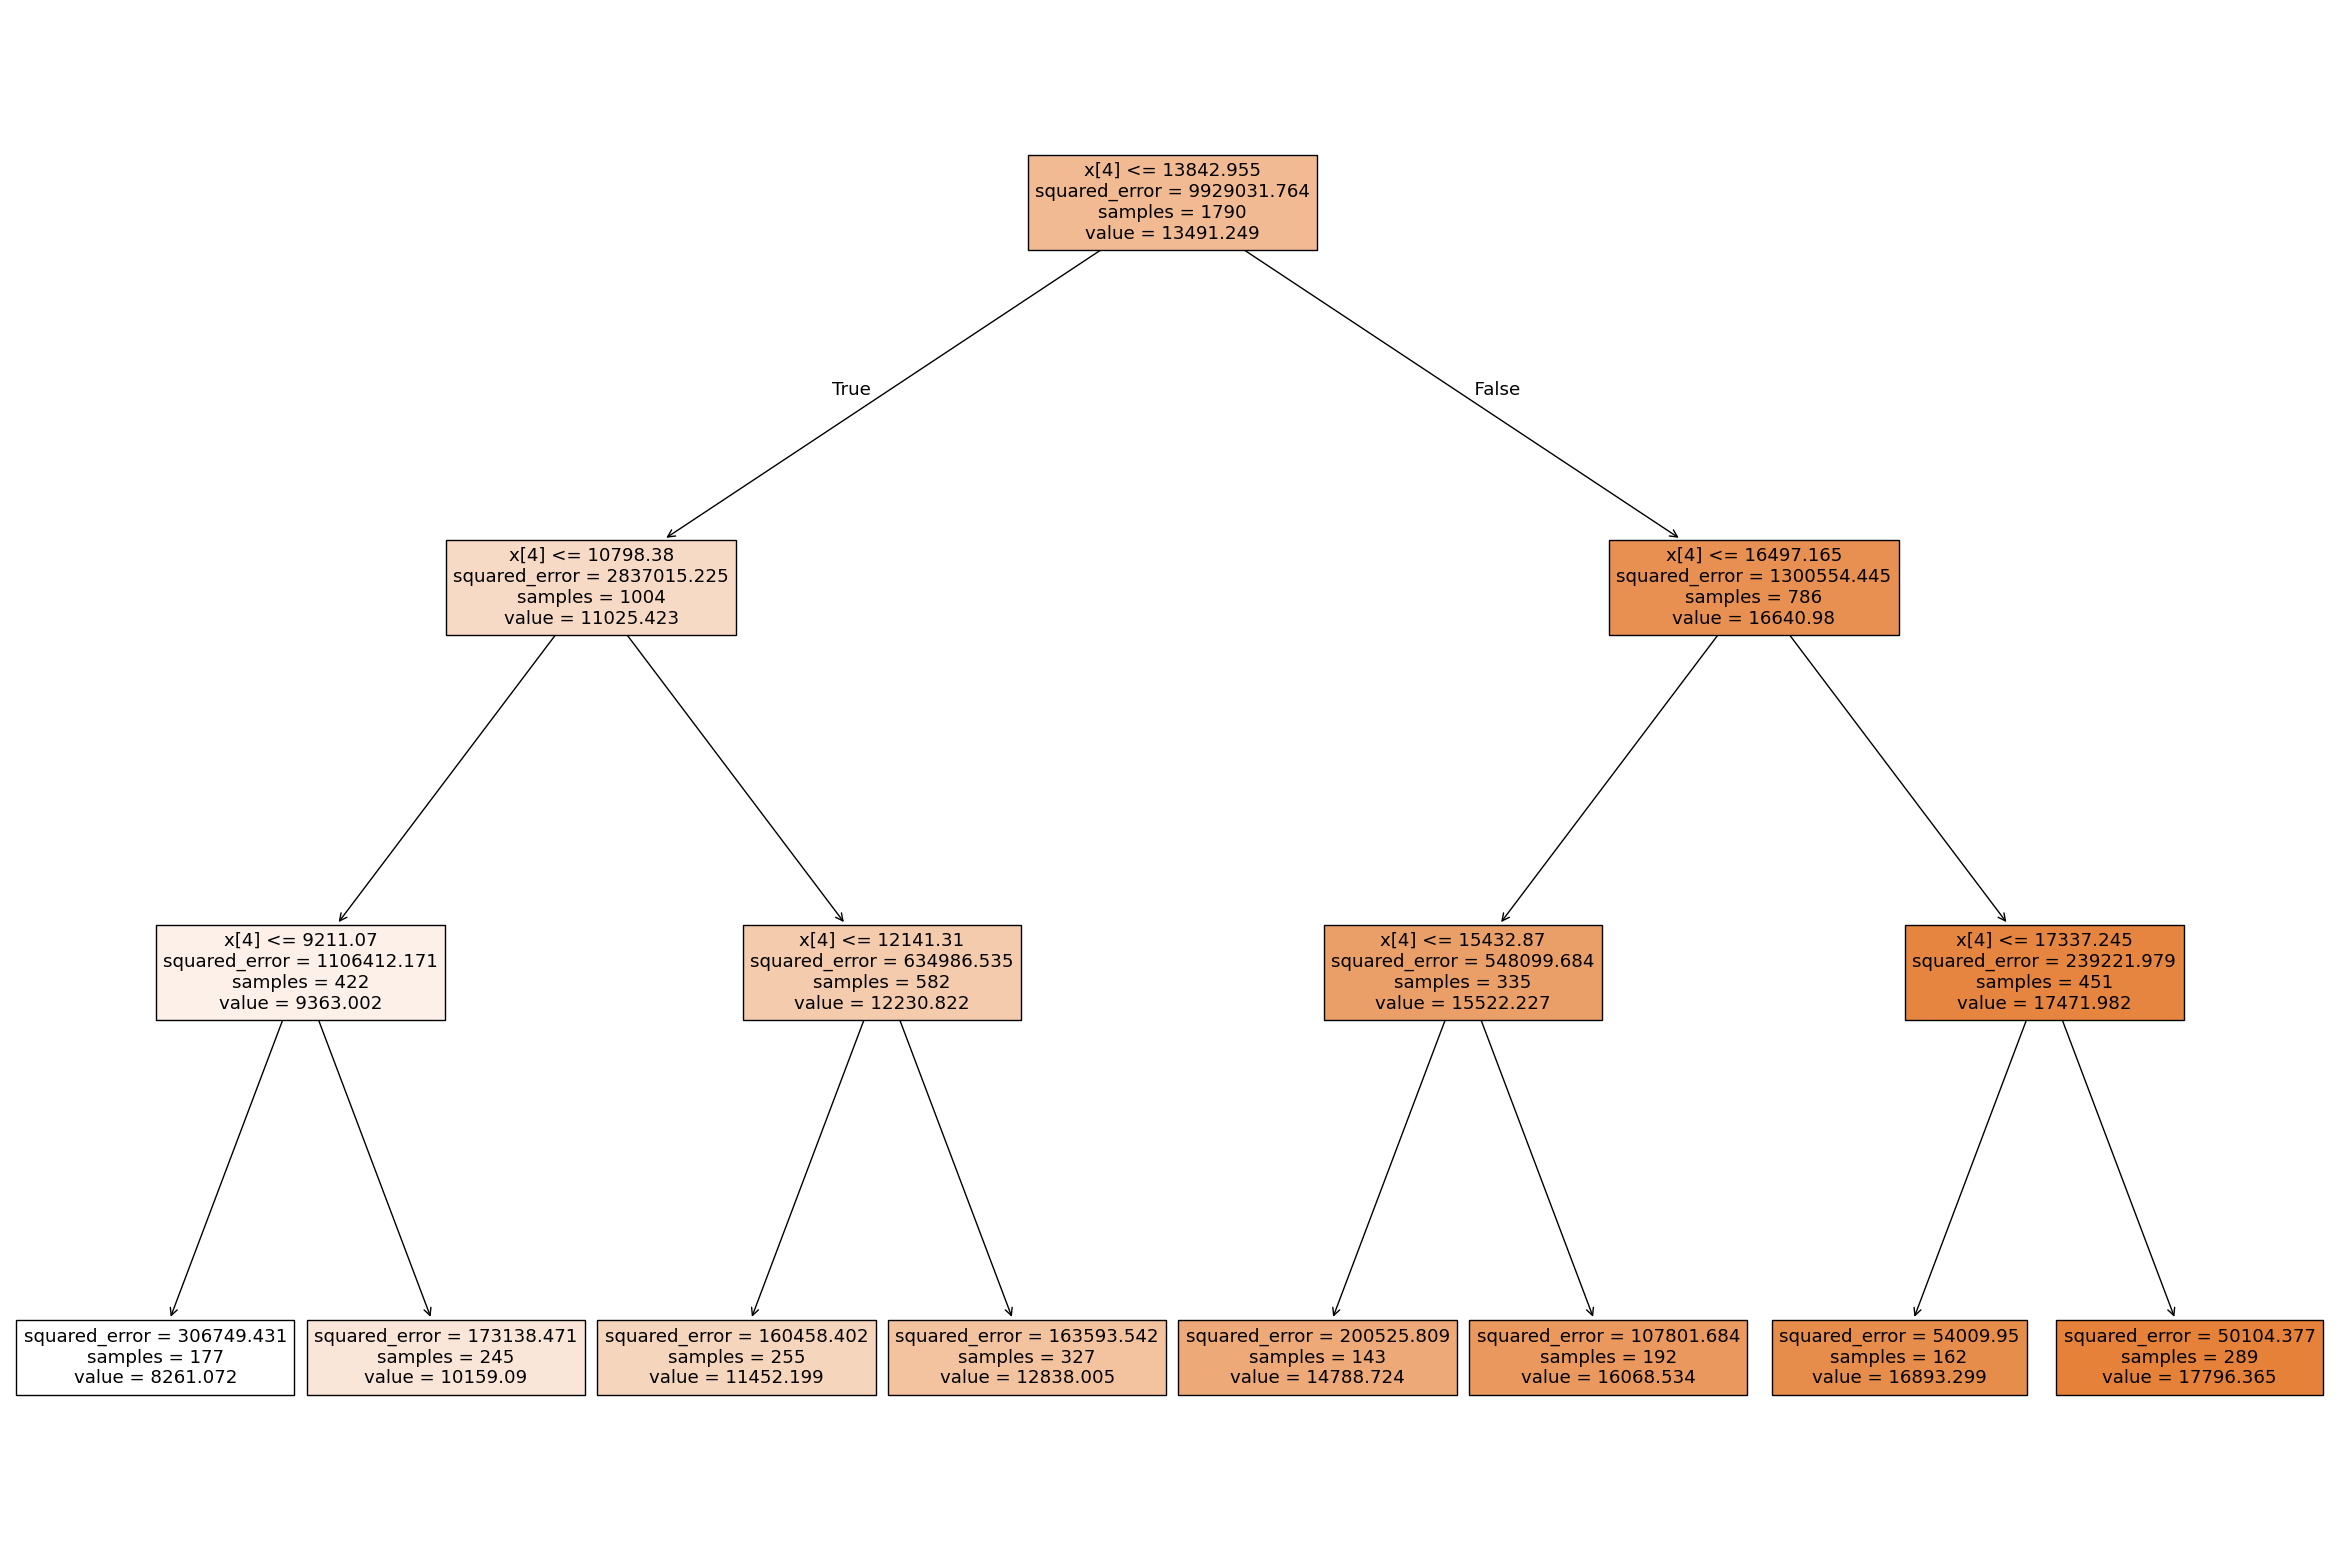

In [351]:
plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()